In [1]:
import torch
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 
outdir = r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\more_recent_test\hierarchical_factor_model"
os.makedirs(outdir, exist_ok=True)
# Reproducibility
#torch.manual_seed(1)
N = 2000  
P= 200
# Scatter of x vs y 
torch.manual_seed(1)

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------

t0 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t1 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t11 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t12 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t21 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t22 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1

a0 = t0 * torch.randn(P)
b1 = t1 * torch.randn(P)
b2 = t2 * torch.randn(P)
detla11= t11 *torch.randn(P)

detla12= t11 *torch.randn(P)
detla21= t11 *torch.randn(P)
detla22= t11 *torch.randn(P)  
f_mat = torch.stack([a0,b1,b2, detla11, detla12,detla21, detla22 ], dim=0)
f_mat

tensor([[ 0.8993,  0.4417, -0.0000,  ...,  0.6032, -1.8230, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000, -0.5855,  1.6023],
        [-0.0000,  0.0000, -0.2332,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.0000,  ...,  1.2064,  0.0000,  0.0781],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0251, -0.0000, -0.7000],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0824, -0.0000,  1.9809]])

In [2]:

N= 1000

L = torch.zeros(N, 7, dtype=torch.float32)


L[:,0]=1
L[0:500, 1]=1

L [500:,2]=1
L[0:250,3]=1
L[251:500,4]=1

L[501:750,5]=1

L[751:,6]=1

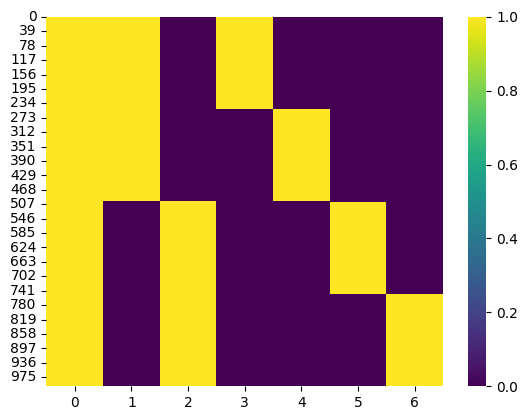

In [3]:


sns.heatmap(L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()


In [4]:
L.shape

torch.Size([1000, 7])

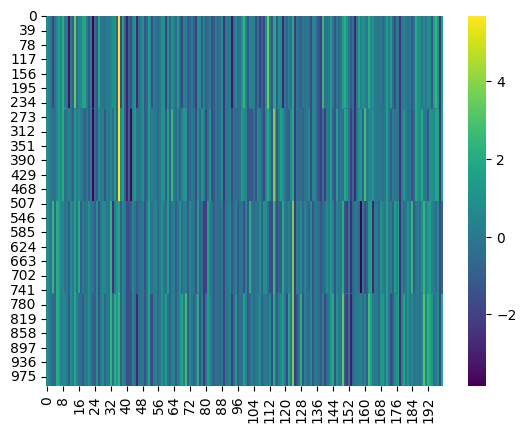

In [ ]:
X_true= L@f_mat 
Z = L@f_mat + 0.5*torch.randn(N, P)  * 2.5  # (N, M)
Z_np = Z.detach().cpu().numpy()

# Save as tab-delimited text
np.savetxt(os.path.join(outdir, "Z_matrix.txt"), Z_np, fmt="%.6f", delimiter="\t")

X_true=  = L@f_mat 
X_np = X_true=.detach().cpu().numpy()

# Save as tab-delimited text
np.savetxt(os.path.join(outdir, "Z_matrix.txt"), Z_np, fmt="%.6f", delimiter="\t")
sns.heatmap(X_true , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

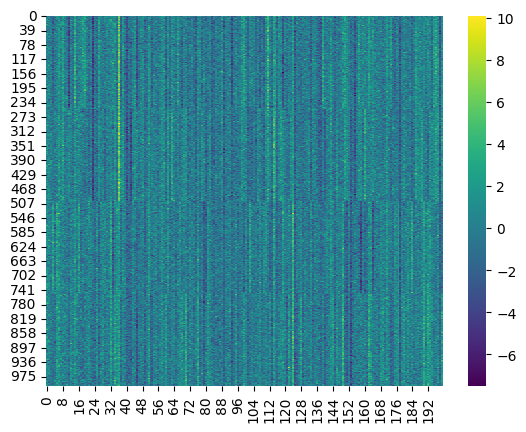

In [6]:
sns.heatmap(Z , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [7]:
from cebmf_torch import cEBMF

In [8]:
 
mycebmf2=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb_sharp", K=10,
                  allow_backfitting=False ) 
mycebmf2.initialise_factors()
mycebmf2.fit(20)

[CGB] Epoch   1/80 | Loss=64.013199 | mu=0.9950 | sigma=0.1990 | mean π0=0.5552
[CGB] Epoch  10/80 | Loss=63.337538 | mu=0.9700 | sigma=0.1940 | mean π0=0.9949
[CGB] Epoch  20/80 | Loss=63.331739 | mu=0.9680 | sigma=0.1936 | mean π0=0.9990
[CGB] Epoch  30/80 | Loss=63.331349 | mu=0.9678 | sigma=0.1936 | mean π0=0.9994
[CGB] Epoch  40/80 | Loss=63.331154 | mu=0.9676 | sigma=0.1935 | mean π0=0.9996
[CGB] Epoch  50/80 | Loss=63.331036 | mu=0.9675 | sigma=0.1935 | mean π0=0.9997
[CGB] Epoch  60/80 | Loss=63.330960 | mu=0.9674 | sigma=0.1935 | mean π0=0.9998
[CGB] Epoch  70/80 | Loss=63.330908 | mu=0.9673 | sigma=0.1935 | mean π0=0.9998
[CGB] Epoch  80/80 | Loss=63.330872 | mu=0.9673 | sigma=0.1935 | mean π0=0.9999
[CGB] Epoch   1/80 | Loss=24.572069 | mu=1.0051 | sigma=0.2010 | mean π0=0.5072
[CGB] Epoch  10/80 | Loss=24.054610 | mu=1.0514 | sigma=0.2103 | mean π0=0.4916
[CGB] Epoch  20/80 | Loss=23.560786 | mu=1.1050 | sigma=0.2210 | mean π0=0.4980
[CGB] Epoch  30/80 | Loss=23.334840 | mu

CEBMFResult(L=tensor([[1.4041e-19, 1.2001e+00, 1.1257e+00,  ..., 1.4453e-05, 8.2373e-10,
         4.5957e-06],
        [3.5811e-19, 1.0511e+00, 1.2209e+00,  ..., 1.0579e-11, 6.7596e-05,
         1.3456e-08],
        [5.9796e-20, 1.2313e+00, 1.1250e+00,  ..., 1.5096e-07, 1.0447e-04,
         9.7429e-01],
        ...,
        [1.3142e-19, 1.3402e+00, 1.2972e+00,  ..., 1.1119e-08, 9.8356e-01,
         8.9527e-03],
        [2.7956e-19, 1.3099e+00, 1.0432e+00,  ..., 1.2369e-12, 9.9417e-01,
         4.9054e-03],
        [1.4261e-19, 1.4218e+00, 1.1286e+00,  ..., 8.3448e-10, 9.9107e-01,
         7.7188e-03]]), F=tensor([[-7.1234e-11,  4.5727e-01,  2.9997e-01,  ...,  8.2911e-02,
         -3.3029e-03,  4.1114e-03],
        [-2.4769e-10,  1.1309e-01,  2.4092e-01,  ..., -1.1122e-01,
          1.7609e-02,  1.5908e-02],
        [-2.4756e-10, -6.8074e-02, -1.2729e-03,  ...,  1.8190e-02,
         -1.9849e-01,  3.0572e-02],
        ...,
        [ 1.9474e-10, -9.9009e-04,  7.0068e-01,  ...,  3.0724e-01

In [9]:
k=0
#mycebmf2._update_factors(k)

In [10]:
mycebmf01=  cEBMF(data=Z, 
                 prior_L="gbinary", K=10,
                  allow_backfitting=False ) 
mycebmf01.initialise_factors()
 
 
mycebmf01.fit(20)

CEBMFResult(L=tensor([[1.2989e-23, 7.2272e+00, 5.4796e+00,  ..., 7.7255e-01, 6.4726e-01,
         1.2989e-23],
        [1.2989e-23, 6.1447e+00, 5.5070e+00,  ..., 8.5566e-01, 6.1446e-01,
         1.2989e-23],
        [1.2989e-23, 7.7199e+00, 5.2741e+00,  ..., 7.6716e-01, 7.0894e-01,
         1.2989e-23],
        ...,
        [1.2989e-23, 9.4654e+00, 1.8574e-04,  ..., 8.2688e-01, 6.8331e-01,
         1.2989e-23],
        [1.2989e-23, 8.7650e+00, 3.3321e-06,  ..., 8.0997e-01, 6.7961e-01,
         1.2989e-23],
        [1.2989e-23, 9.5553e+00, 1.0961e-05,  ..., 8.4517e-01, 6.7256e-01,
         1.2989e-23]]), F=tensor([[ 6.9923e-15,  1.0297e-01,  1.3880e-01,  ...,  2.5251e-04,
          5.0509e-05,  7.2908e-15],
        [ 4.1982e-15,  4.6254e-02,  8.3166e-02,  ...,  1.5365e-04,
          2.3713e-05,  4.0900e-15],
        [-2.4328e-15, -2.4796e-02,  6.1237e-06,  ..., -9.4719e-05,
         -2.1394e-05, -2.4391e-15],
        ...,
        [ 6.5245e-15,  8.3537e-02,  2.7526e-01,  ...,  2.5804e-04

In [11]:
mycebmf0=  cEBMF(data=Z ,K=10 ) 
mycebmf0.initialise_factors()
mycebmf0.fit(20)

CEBMFResult(L=tensor([[-14.6431,  -8.5592,  -7.8450,  ...,   0.0000,   0.0000,   0.0000],
        [-14.4401,  -8.6061,  -4.8383,  ...,   0.0000,   0.0000,   0.0000],
        [-14.8648,  -8.1609,  -8.3798,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-12.8027,   9.1314,   2.1035,  ...,   0.0000,   0.0000,   0.0000],
        [-10.7544,  10.0296,   0.9642,  ...,   0.0000,   0.0000,   0.0000],
        [-12.4057,  10.5523,   0.3726,  ...,   0.0000,   0.0000,   0.0000]]), F=tensor([[-6.2307e-02,  2.6313e-02,  1.8636e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.2737e-02,  9.7870e-04,  1.5961e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.5727e-03, -1.1889e-02, -1.5402e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-8.9937e-02, -2.9376e-02,  2.6721e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.6103e-01,  2.4437e-04, -1.9666e-04,  ...,  0.0000e+00,
          0.0000e+00,

In [12]:
 
mycebmf1=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb", K=10,
                  allow_backfitting=False ) 
mycebmf1.initialise_factors()
 

mycebmf1.F = mycebmf0.F
mycebmf1.fit(20)

[CGB] Epoch 10/50, Loss=5.4602, mu2=-0.080, sigma2=13.247
[CGB] Epoch 20/50, Loss=5.4547, mu2=-0.160, sigma2=13.530
[CGB] Epoch 30/50, Loss=5.4478, mu2=-0.241, sigma2=12.842
[CGB] Epoch 40/50, Loss=5.4423, mu2=-0.322, sigma2=13.034
[CGB] Epoch 50/50, Loss=5.4363, mu2=-0.402, sigma2=13.082
[CGB] Epoch 10/50, Loss=5.0340, mu2=0.066, sigma2=8.654
[CGB] Epoch 20/50, Loss=5.0335, mu2=0.130, sigma2=8.700
[CGB] Epoch 30/50, Loss=5.0320, mu2=0.192, sigma2=8.484
[CGB] Epoch 40/50, Loss=5.0316, mu2=0.253, sigma2=8.568
[CGB] Epoch 50/50, Loss=5.0304, mu2=0.311, sigma2=8.498
[CGB] Epoch 10/50, Loss=3.8929, mu2=-0.009, sigma2=6.025
[CGB] Epoch 20/50, Loss=3.8693, mu2=-0.020, sigma2=5.964
[CGB] Epoch 30/50, Loss=3.8664, mu2=-0.031, sigma2=6.044
[CGB] Epoch 40/50, Loss=3.8577, mu2=-0.043, sigma2=6.044
[CGB] Epoch 50/50, Loss=3.8613, mu2=-0.053, sigma2=6.240
[CGB] Epoch 10/50, Loss=3.7749, mu2=0.050, sigma2=5.595
[CGB] Epoch 20/50, Loss=3.7574, mu2=0.102, sigma2=5.528
[CGB] Epoch 30/50, Loss=3.7588, m

CEBMFResult(L=tensor([[-1.4130e+01, -7.6537e+00, -7.4347e+00,  ...,  1.1364e-12,
          6.4306e-13,  1.4169e-10],
        [-1.4055e+01, -7.7681e+00, -4.6857e+00,  ...,  1.8717e-11,
          9.7633e-15,  1.3598e-13],
        [-1.4429e+01, -7.3139e+00, -8.1825e+00,  ...,  2.6579e-12,
          7.6826e-13,  1.4883e-10],
        ...,
        [-1.2349e+01,  8.6516e+00,  2.1507e-05,  ...,  9.9442e-12,
          7.2874e-13,  8.8049e-11],
        [-1.0384e+01,  9.3915e+00, -1.7393e-06,  ...,  4.6851e-12,
          2.6223e-13,  5.1810e-11],
        [-1.2054e+01,  9.8380e+00, -3.4342e-05,  ...,  6.0778e-12,
          3.7344e-13,  2.2016e-10]]), F=tensor([[-6.3564e-02,  2.8514e-02,  2.3907e-02,  ...,  1.0213e-08,
          3.5080e-09,  2.0497e-06],
        [-3.3373e-02,  1.0695e-03,  1.4960e-03,  ...,  2.1975e-08,
          9.9241e-10,  6.2020e-07],
        [ 8.6545e-03, -1.2944e-02, -1.5713e-04,  ..., -3.3249e-09,
         -3.4080e-09, -3.7211e-06],
        ...,
        [-9.1716e-02, -3.1424

In [13]:
mycebmf1.F

tensor([[-6.3564e-02,  2.8514e-02,  2.3907e-02,  ...,  1.0213e-08,
          3.5080e-09,  2.0497e-06],
        [-3.3373e-02,  1.0695e-03,  1.4960e-03,  ...,  2.1975e-08,
          9.9241e-10,  6.2020e-07],
        [ 8.6545e-03, -1.2944e-02, -1.5713e-04,  ..., -3.3249e-09,
         -3.4080e-09, -3.7211e-06],
        ...,
        [-9.1716e-02, -3.1424e-02,  2.3764e-02,  ...,  4.8710e-08,
         -2.1855e-09,  5.1581e-08],
        [ 1.6378e-01,  1.1007e-04, -1.6306e-05,  ..., -2.0434e-08,
         -3.7066e-09, -3.4261e-06],
        [-8.1566e-02, -4.6127e-02,  3.5287e-02,  ..., -2.6017e-09,
          3.3872e-09,  2.1994e-06]])

(array([ 34., 146.,  64.,   5., 502.,   0.,  21., 122.,  94.,  12.]),
 array([-9.86671257, -7.86204004, -5.85736752, -3.85269499, -1.84802246,
         0.15665054,  2.16132259,  4.16599464,  6.17066765,  8.17534065,
        10.18001175]),
 <BarContainer object of 10 artists>)

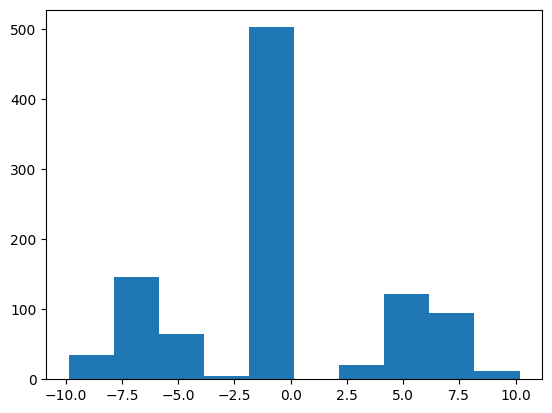

In [14]:
plt.hist(mycebmf1.L[:,3 ])


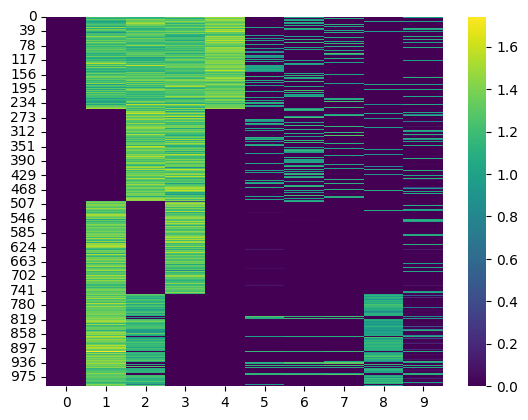

In [15]:
sns.heatmap(mycebmf2.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

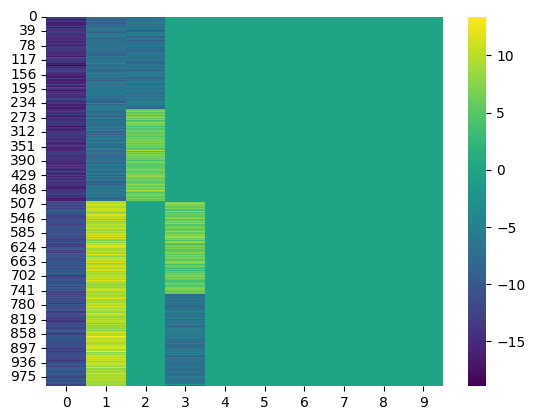

In [16]:
 
sns.heatmap(mycebmf1.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

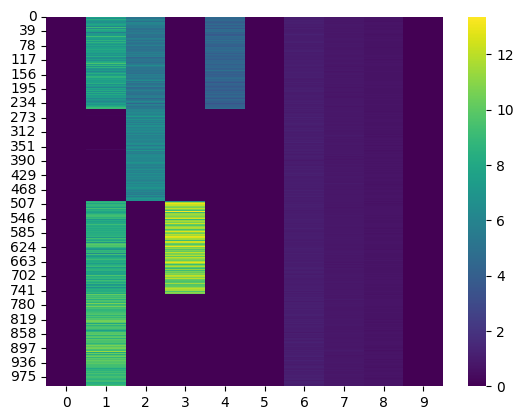

In [25]:
sns.heatmap(mycebmf01.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

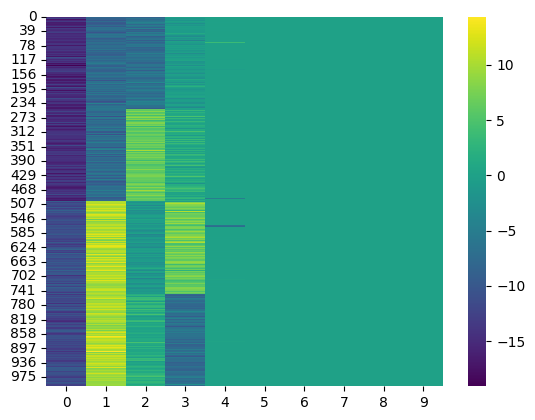

In [26]:
sns.heatmap(mycebmf0.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [27]:
mycebmf1.L[:,4]

tensor([-7.5953e-13, -4.9316e-12, -2.6077e-12, -2.0805e-12, -2.1125e-12,
        -5.0586e-12, -2.7729e-13, -2.8722e-13, -6.6733e-13, -5.3557e-13,
        -8.1844e-12, -3.2379e-12, -4.8459e-12, -1.2190e-14, -3.8151e-12,
        -5.5764e-12, -3.5525e-12, -2.1896e-12, -9.8655e-13,  0.0000e+00,
        -1.5671e-12, -5.1803e-13, -2.4241e-12, -2.7707e-12, -3.4031e-12,
        -2.1157e-12, -8.4651e-13, -1.8869e-12, -2.7251e-12, -4.0607e-13,
        -4.2975e-12, -3.6979e-12, -3.0474e-13, -7.8073e-12, -1.7476e-12,
        -7.6938e-12, -1.5047e-12, -2.8380e-12, -5.5718e-12, -4.3648e-12,
        -2.2428e-12, -3.2965e-12, -9.3635e-13, -9.1428e-15, -5.1236e-12,
        -5.6370e-14, -9.9041e-14, -1.2662e-12, -8.5778e-13, -8.1892e-13,
        -1.5069e-12, -5.2862e-12,  0.0000e+00, -1.3576e-12, -4.2160e-12,
        -3.3543e-12, -1.4323e-13, -4.5927e-12, -8.6270e-12, -3.1877e-12,
        -1.2775e-12, -4.4438e-12, -4.1742e-12, -8.7992e-13, -1.2479e-12,
        -7.1614e-14, -2.4457e-13, -5.6764e-12, -2.3

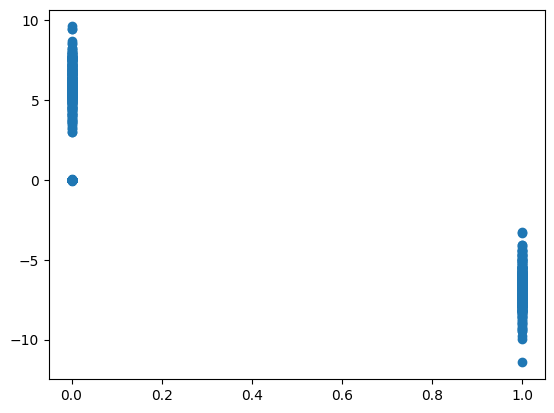

In [28]:
plt.scatter(L[:,3],mycebmf1.L[:,2])

(array([  3.,   3.,   1.,   5.,   4.,  16.,  40.,  85., 257., 586.]),
 array([-1.82219639e-11, -1.63997670e-11, -1.45775718e-11, -1.27553749e-11,
        -1.09331780e-11, -9.11098107e-12, -7.28878503e-12, -5.46658899e-12,
        -3.64439208e-12, -1.82219517e-12,  0.00000000e+00]),
 <BarContainer object of 10 artists>)

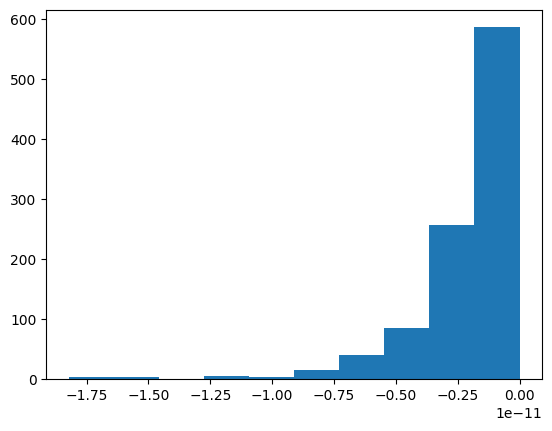

In [29]:
plt.hist(mycebmf1.L[:,4 ])

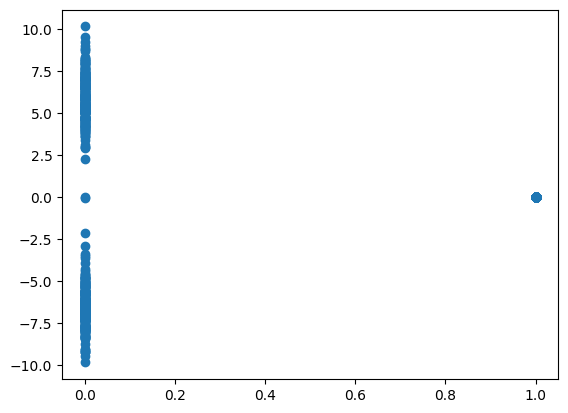

In [30]:
plt.scatter(L[:,1],mycebmf1.L[:,3])

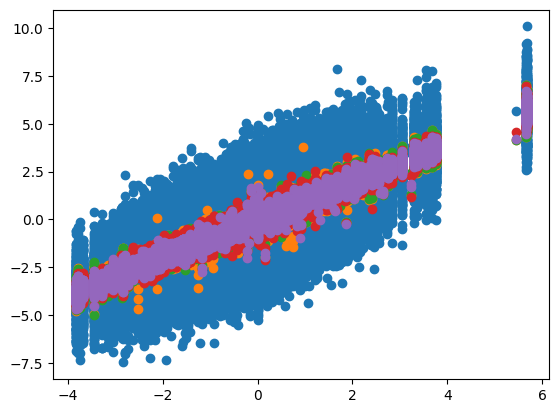

In [23]:
plt.scatter(L@f_mat,Z)
plt.scatter(L@f_mat,mycebmf0.L@mycebmf0.F.T )
plt.scatter(L@f_mat,mycebmf1.L@mycebmf1.F.T )

plt.scatter(L@f_mat,mycebmf2.L@ mycebmf2.F.T )

plt.scatter(L@f_mat,mycebmf01.L@mycebmf01.F.T )

In [24]:
print(torch.mean((L@f_mat - mycebmf0.L@ mycebmf0.F.T )**2))
print(torch.mean((L@f_mat - mycebmf01.L@ mycebmf01.F.T )**2))
print(torch.mean((L@f_mat - mycebmf1.L@ mycebmf1.F.T )**2))
print(torch.mean((L@f_mat - mycebmf2.L@ mycebmf2.F.T )**2)) 

tensor(0.0374)
tensor(0.0169)
tensor(0.0305)
tensor(0.0350)
